<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2_8)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,34.926874,44.298448,78.609473,-95.747308,72.087487,203.842818,-131.755331
1,0.0,1.0,82.957009,30.179593,86.485543,-118.534563,91.087583,121.254279,-30.166696
2,0.0,2.0,53.642064,27.106954,25.293552,-47.457752,68.584817,133.936069,-65.351252
3,0.0,3.0,76.201629,98.540374,49.487001,96.943508,331.172512,190.184214,140.988299
4,0.0,4.0,46.111206,63.776428,89.112116,284.854811,493.854560,213.513383,280.341178
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,41.884209,75.626697,85.632532,1094.611534,1307.754972,322.548347,985.206625
119996,999.0,116.0,92.448161,32.726045,74.654221,-0.051184,209.777243,257.746425,-47.969182
119997,999.0,117.0,81.956694,29.923322,75.141691,88.729584,285.751291,223.977527,61.773764
119998,999.0,118.0,34.741447,82.068765,25.815578,-69.930416,82.695374,196.971795,-114.276420


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    34.926874  44.298448  78.609473   -95.747308    72.087487   
      1.0    82.957009  30.179593  86.485543  -118.534563    91.087583   
      2.0    53.642064  27.106954  25.293552   -47.457752    68.584817   
      3.0    76.201629  98.540374  49.487001    96.943508   331.172512   
      4.0    46.111206  63.776428  89.112116   284.854811   493.854560   
...                ...        ...        ...          ...          ...   
999.0 115.0  41.884209  75.626697  85.632532  1094.611534  1307.754972   
      116.0  92.448161  32.726045  74.654221    -0.051184   209.777243   
      117.0  81.956694  29.923322  75.141691    88.729584   285.751291   
      118.0  34.741447  82.068765  25.815578   -69.930416    82.695374   
      119.0  22.397620  69.325109  57.139718    -9.606796   149.255652   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    203.842818 -131.755331  
      1.0    121.254279  -30.166696  
      2.0    133.936069  -65.351252  
      3.0    190.184214  140.988299  
      4.0    213.513383  280.341178  
...                 ...         ...  
999.0 115.0  322.548347  985.206625  
      116.0  257.746425  -47.969182  
      117.0  223.977527   61.773764  
      118.0  196.971795 -114.276420  
      119.0  190.559439  -41.303786  

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    34.926874  44.298448  78.609473   -95.747308    72.087487   
      1.0    82.957009  30.179593  86.485543  -118.534563    91.087583   
      2.0    53.642064  27.106954  25.293552   -47.457752    68.584817   
      3.0    76.201629  98.540374  49.487001    96.943508   331.172512   
      4.0    46.111206  63.776428  89.112116   284.854811   493.854560   
...                ...        ...        ...          ...          ...   
999.0 115.0  41.884209  75.626697  85.632532  1094.611534  1307.754972   
      116.0  92.448161  32.726045  74.654221    -0.051184   209.777243   
      117.0  81.956694  29.923322  75.141691    88.729584   285.751291   
      118.0  34.741447  82.068765  25.815578   -69.930416    82.695374   
      119.0  22.397620  69.325109  57.139718    -9.606796   149.255652   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    203.842818 -131.755331  
      1.0    121.254279  -30.166696  
      2.0    133.936069  -65.351252  
      3.0    190.184214  140.988299  
      4.0    213.513383  280.341178  
...                 ...         ...  
999.0 115.0  322.548347  985.206625  
      116.0  257.746425  -47.969182  
      117.0  223.977527   61.773764  
      118.0  196.971795 -114.276420  
      119.0  190.559439  -41.303786  

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,34.926874,44.298448,78.609473,-95.747308,72.087487,203.842818,-131.755331
1,0.0,1.0,82.957009,30.179593,86.485543,-118.534563,91.087583,121.254279,-30.166696
2,0.0,2.0,53.642064,27.106954,25.293552,-47.457752,68.584817,133.936069,-65.351252
3,0.0,3.0,76.201629,98.540374,49.487001,96.943508,331.172512,190.184214,140.988299
4,0.0,4.0,46.111206,63.776428,89.112116,284.854811,493.854560,213.513383,280.341178
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,41.884209,75.626697,85.632532,1094.611534,1307.754972,322.548347,985.206625
119996,999.0,116.0,92.448161,32.726045,74.654221,-0.051184,209.777243,257.746425,-47.969182
119997,999.0,117.0,81.956694,29.923322,75.141691,88.729584,285.751291,223.977527,61.773764
119998,999.0,118.0,34.741447,82.068765,25.815578,-69.930416,82.695374,196.971795,-114.276420


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    34.926874  44.298448  78.609473   -95.747308    72.087487   
      1.0    82.957009  30.179593  86.485543  -118.534563    91.087583   
      2.0    53.642064  27.106954  25.293552   -47.457752    68.584817   
      3.0    76.201629  98.540374  49.487001    96.943508   331.172512   
      4.0    46.111206  63.776428  89.112116   284.854811   493.854560   
...                ...        ...        ...          ...          ...   
999.0 115.0  41.884209  75.626697  85.632532  1094.611534  1307.754972   
      116.0  92.448161  32.726045  74.654221    -0.051184   209.777243   
      117.0  81.956694  29.923322  75.141691    88.729584   285.751291   
      118.0  34.741447  82.068765  25.815578   -69.930416    82.695374   
      119.0  22.397620  69.325109  57.139718    -9.606796   149.255652   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    203.842818 -131.755331  
      1.0    121.254279  -30.166696  
      2.0    133.936069  -65.351252  
      3.0    190.184214  140.988299  
      4.0    213.513383  280.341178  
...                 ...         ...  
999.0 115.0  322.548347  985.206625  
      116.0  257.746425  -47.969182  
      117.0  223.977527   61.773764  
      118.0  196.971795 -114.276420  
      119.0  190.559439  -41.303786  

[120000 rows x 7 columns]

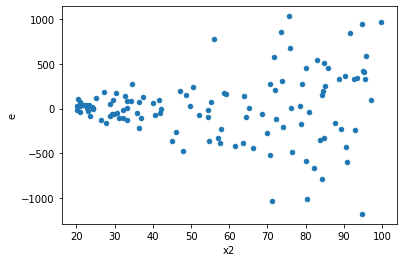

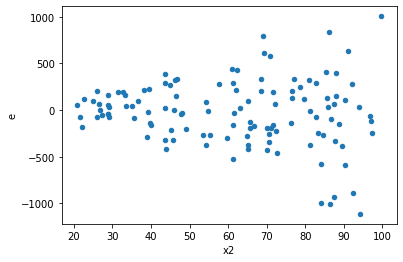

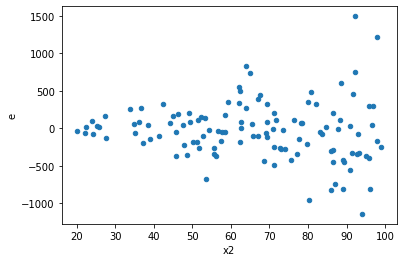

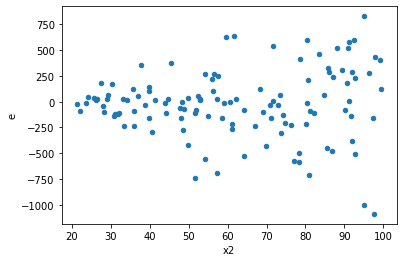

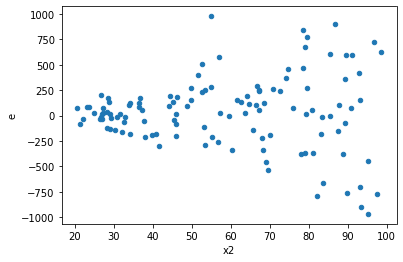

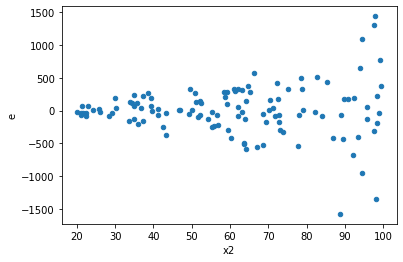

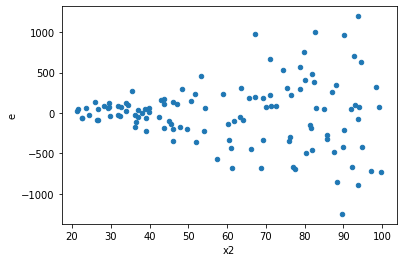

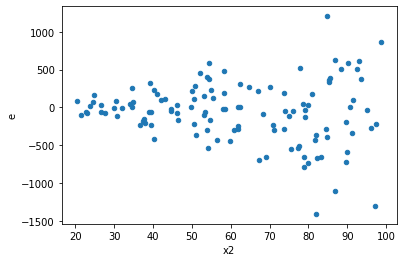

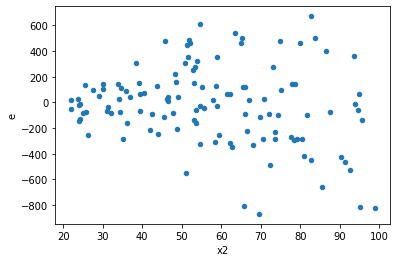

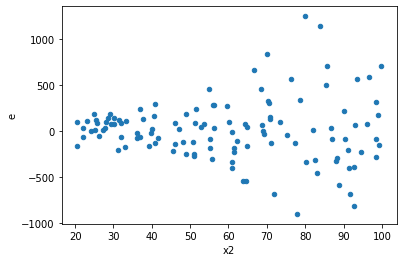

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,67.0,47.0,8526821.472283438,11053482.152972743,127265.9921236334,235180.4713398456,1.8479443519473604,0.02777546410934395,0.986112267945328,0.013887732054671975,Reject005=0 : Heteroscedasticity
1.0,65.0,49.0,5144818.586201102,10870004.07469339,79151.05517232465,221836.8178508855,2.8027019648431835,0.0002517032543001285,0.9998741483728499,0.00012585162715006426,Reject005=0 : Heteroscedasticity
3.0,66.0,48.0,6077533.43299119,8462080.53405972,92083.83989380591,176293.3444595775,1.9144873265806979,0.01945368796452085,0.9902731560177396,0.009726843982260425,Reject005=0 : Heteroscedasticity
5.0,61.0,53.0,7115817.8091322,8707759.290680403,116652.75096938033,164297.34510717742,1.4084309520510416,0.2042293294025801,0.89788533529871,0.10211466470129005,Reject005=1 : Homoscedasticity
6.0,47.0,67.0,2690963.859769686,13195835.756817136,57254.550207865665,196952.772489808,3.439949694386919,4.0303035115929475e-06,0.9999979848482442,2.0151517557964738e-06,Reject005=0 : Heteroscedasticity
7.0,51.0,63.0,1538197.5996009207,14711041.853362108,30160.737247076875,233508.60084701757,7.742138361344228,2.2071233729548112e-13,0.9999999999998896,1.1035616864774056e-13,Reject005=0 : Heteroscedasticity
8.0,68.0,46.0,8618015.31222205,10130583.563637957,126735.5192973831,220230.07747039036,1.737713931274654,0.048469492011768756,0.9757652539941156,0.024234746005884378,Reject005=0 : Heteroscedasticity
10.0,58.0,56.0,1332515.0286835048,14381848.64253749,22974.397046267324,256818.72575959802,11.17847511916852,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
11.0,59.0,55.0,6558508.546330171,6640959.535126996,111161.16180220629,120744.71882049085,1.0862131779023412,0.7586028863681329,0.6206985568159336,0.37930144318406644,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,67.0,47.0,8526821.472283438,11053482.152972743,127265.9921236334,235180.4713398456,1.8479443519473604,0.02777546410934395,Reject005=0 : Heteroscedasticity
1.0,65.0,49.0,5144818.586201102,10870004.07469339,79151.05517232465,221836.8178508855,2.8027019648431835,0.0002517032543001285,Reject005=0 : Heteroscedasticity
2.0,59.0,55.0,9212721.976954324,6782392.054964331,156147.8301178699,123316.21918116965,0.789740203806118,0.37350236611477766,Reject005=1 : Homoscedasticity
3.0,66.0,48.0,6077533.43299119,8462080.53405972,92083.83989380591,176293.3444595775,1.9144873265806979,0.01945368796452085,Reject005=0 : Heteroscedasticity
4.0,56.0,58.0,7563319.190459666,6618953.07296845,135059.27125820832,114119.88056842156,0.8449614713990681,0.5281568689958036,Reject005=1 : Homoscedasticity
5.0,61.0,53.0,7115817.8091322,8707759.290680403,116652.75096938033,164297.34510717742,1.4084309520510416,0.2042293294025801,Reject005=1 : Homoscedasticity
6.0,47.0,67.0,2690963.859769686,13195835.756817136,57254.550207865665,196952.772489808,3.439949694386919,4.0303035115929475e-06,Reject005=0 : Heteroscedasticity
7.0,51.0,63.0,1538197.5996009207,14711041.853362108,30160.737247076875,233508.60084701757,7.742138361344228,2.2071233729548112e-13,Reject005=0 : Heteroscedasticity
8.0,68.0,46.0,8618015.31222205,10130583.563637957,126735.5192973831,220230.07747039036,1.737713931274654,0.048469492011768756,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    656
Reject005=1 : Homoscedasticity      344
Name: Result_test, dtype: int64